In [33]:
#importing the libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 


In [2]:
zomato = pd.read_csv("zomato.csv")

In [3]:
zomato.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


About the data ..

In [6]:
print("zomato dataset has {} rows and {} columns".format(zomato.shape[0],zomato.shape[1]))

zomato dataset has 51717 rows and 17 columns


In [8]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

Columns description

url :contains the url of the restaurant in the zomato website

address :contains the address of the restaurant in Bengaluru

name: contains the name of the restaurant

online_order :whether online ordering is available in the restaurant or not

book_table :table book option available or not

rate :contains the overall rating of the restaurant out of 5

votes :contains total number of rating for the restaurant as of the above mentioned date

phone :contains the phone number of the restaurant

location :contains the neighborhood in which the restaurant is located

rest_type: restaurant type

dish_liked :dishes people liked in the restaurant

cuisines :food styles, separated by comma

approx_cost(for two people): contains the approximate cost for meal for two people

reviews_list: list of tuples containing reviews for the restaurant, each tuple

menu_item: contains list of menus available in the restaurant

listed_in(type): type of meal

listed_in(city): contains the neighborhood in which the restaurant is listed

# Exploratory Data Analysis :

Which are the  restaurants having more outlets in Bangaluru?

Text(0.5, 0, 'Number of outlets')

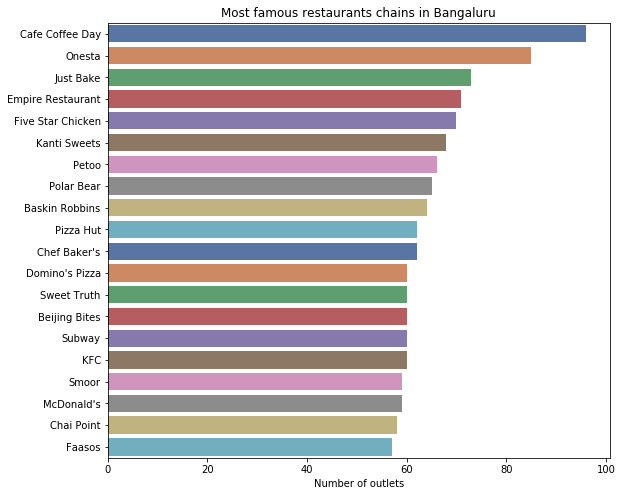

In [14]:
plt.figure(figsize=(9,8))
chains=zomato['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")

How many of the restuarants do not accept online orders?

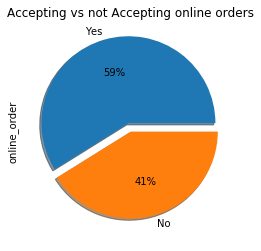

In [26]:
zomato['online_order'].value_counts().plot.pie(explode = [0.1,0],autopct = '%1.0f%%', shadow = True)

plt.title('Accepting vs not Accepting online orders')
plt.show()

As clearly indicated,almost 60 percent of restaurants in Banglore accepts online orders.
Nearly 40 per cent of the restaurants do not accept online orders.
This might be because of the fact that these restaurants cannot afford to pay commission to zomato for giving them orders online. 
zomato may want to consider giving them some more benefits if they want to increse the number of restaurants serving their customers online.

What is the ratio b/w restaurants that provide and do not provide table booking ?

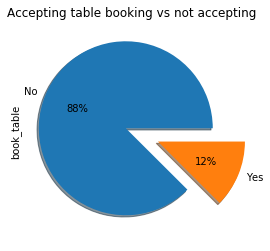

In [30]:
zomato["book_table"].value_counts().plot.pie(explode=[0.1,0.3],autopct='%1.0f%%', shadow = True)
plt.title('Accepting table booking vs not accepting ')
plt.show()

Almost 90 percent of restaurants in Banglore do not provide table booking facility.
In India you cannot find table booking facility in any average restaurants,usually only five star restaurants provides table booking.


# Rating distribution

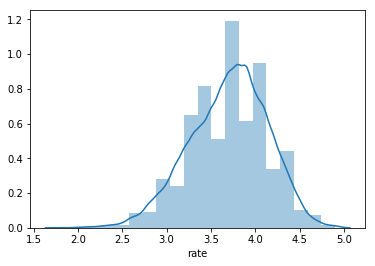

In [39]:
rating=zomato['rate'].dropna().apply(lambda x : float(x.split('/')[0]) if (len(x)>3)  else np.nan ).dropna()
sns.distplot(rating,bins=20)

Almost more than 50 percent of restaurants has rating between 3 and 4.
Restaurants having rating more than 4.5 are very rare.

# Distribution of cost for two people 

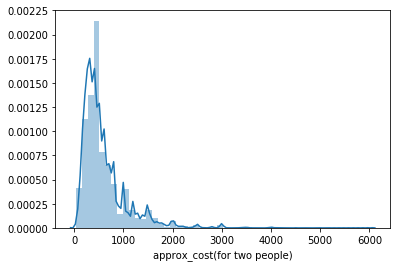

In [42]:
zomato_dist=zomato[['rate','approx_cost(for two people)','online_order']].dropna()
zomato_dist['approx_cost(for two people)']=zomato_dist['approx_cost(for two people)'].apply(lambda x: int(x.replace(',','')))
sns.distplot(zomato_dist['approx_cost(for two people)'])
plt.show()

We can see that the distribution if right skewed.
This means almost 90percent of restaurants serve food for budget less than 1000 INR

Which are the most common restaurant type in Banglore?

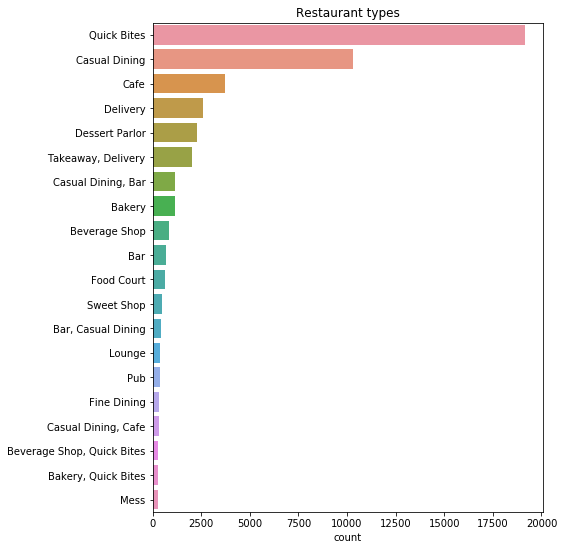

In [45]:
plt.figure(figsize=(7,9))
rest=zomato['rest_type'].value_counts()[:20]
sns.barplot(rest,rest.index)
plt.title("Restaurant types")
plt.xlabel("count")
plt.show()

No doubt about this as Banglore is known as the tech capital of India,people having busy and modern life will prefer Quick Bites.
We can observe tha Quick Bites type restaurants dominates.

Which are the foodie areas?

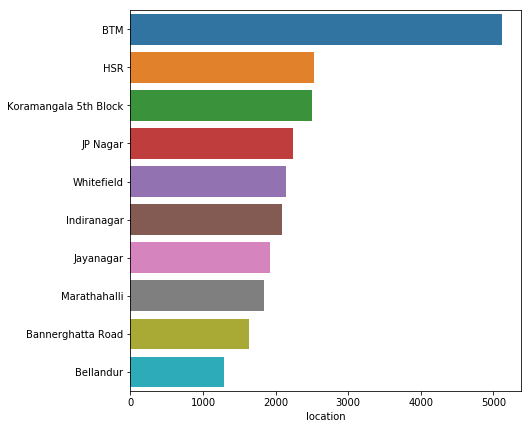

In [49]:
plt.figure(figsize=(7,7))
Rest_locations=zomato['location'].value_counts()[:10]
sns.barplot(Rest_locations,Rest_locations.index)
plt.show()

We can see that BTM,HSR and Koranmangala 5th block has the most number of restaurants.
BTM dominates the section by having more than 5000 restaurants.

Which are the most common cuisines in each locations?

In [53]:
df_1=zomato.groupby(['location','cuisines']).agg('count')
data=df_1.sort_values(['url'],ascending=False).groupby(['location'],as_index=False).apply(lambda x : x.sort_values(by="url",
                            ascending=False).head(3))['url'].reset_index().rename(columns={'url':'count'})

In [54]:
data.head()

,level_0,location,cuisines,count
0,0,BTM,"North Indian, Chinese",379
1,0,BTM,North Indian,340
2,0,BTM,Biryani,120
3,1,Banashankari,South Indian,86
4,1,Banashankari,"North Indian, Chinese",61
